In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

In [3]:

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'carlini'


df = pd.read_csv(f'./3h_data/{station}.csv')

cols = [col for col in df.columns]

df_copy = df[cols]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88473 entries, 0 to 88472
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    88473 non-null  object 
 1   temp    88473 non-null  float64
 2   dir     88461 non-null  float64
 3   vel     86306 non-null  float64
 4   prec    6606 non-null   float64
 5   pres    88470 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.1+ MB


In [6]:
target = "temp"

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)

# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar y convertir los outliers a NaN
df[target] = df[target].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

temp
dir
vel
prec
pres


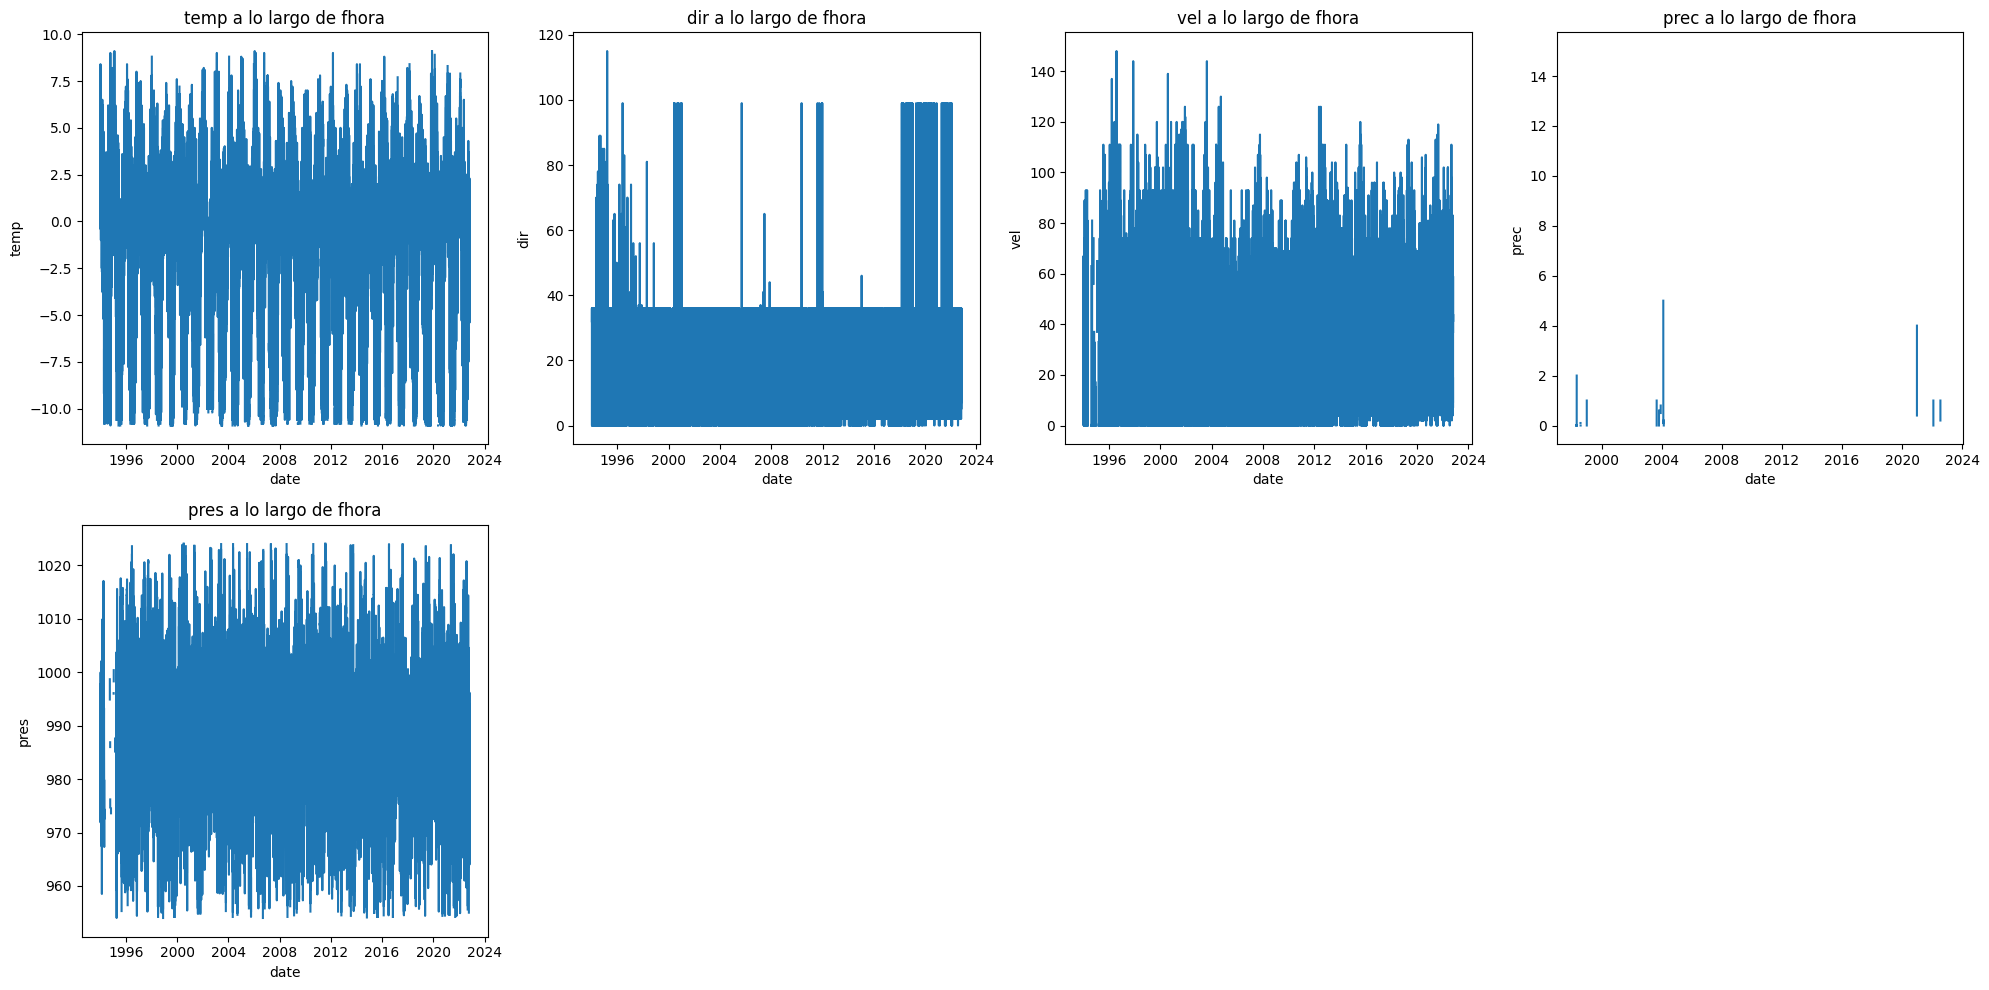

In [7]:
df['date'] = pd.to_datetime(df['date'])

num_cols = len(df.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('date')):
    print(col)
    ax.plot(df['date'], df[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [8]:
df.to_csv(f'./3h_data/3h_data_clean/{station}_clean.csv', index=False)